Import libraries

In [2]:
import pandas as pd

In [3]:
file = "/Users/kc/Desktop/DSA3101/project/Amazon_fashion/Amazon_Fashion.jsonl"
# Converting datatype to match the fields specified in Amazon Reviews'23
dtype = {"rating": float, 
         "title": str, 
         "text": str, 
         "images": list, 
         "asin": str, 
         "parent_asin": str, 
         "user_id": str}
reviews = pd.read_json(file, lines = True, dtype = dtype)

In [4]:
print(reviews.shape)
print(reviews.dtypes)

(2500939, 10)
rating                      float64
title                        object
text                         object
images                       object
asin                         object
parent_asin                  object
user_id                      object
timestamp            datetime64[ns]
helpful_vote                  int64
verified_purchase              bool
dtype: object


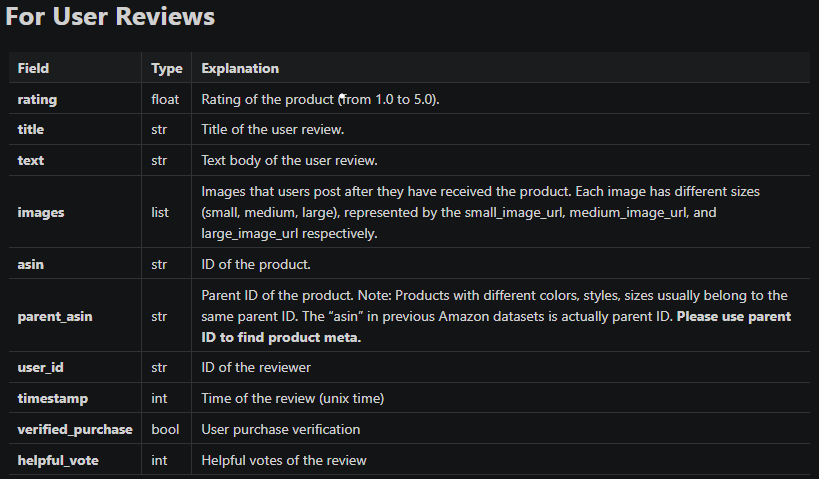

In [5]:
print(reviews.tail())

         rating                                              title  \
2500934     5.0  ... allowed them to be used to add military ri...   
2500935     1.0                           Didn’t come with all ten   
2500936     3.0                            Not checked for quality   
2500937     5.0                                            Awesome   
2500938     1.0                                  Empty plastic bag   

                                                      text images        asin  \
2500934  The tie tacks were the size that allowed them ...     []  B00YGFMQC0   
2500935          Says ten tie clips but o only received 7.     []  B00YGFMQC0   
2500936  When I received them 2-3 of them did not open ...     []  B00YGFMQC0   
2500937                                     Great product.     []  B00YGFMQC0   
2500938  I got an empty bag in my package of 10 that I ...     []  B00YGFMQC0   

        parent_asin                       user_id               timestamp  \
2500934  B00YGF

In [6]:
print(reviews["timestamp"].head())
print(type(reviews["timestamp"][1]))

0   2020-01-09 00:06:34.489
1   2020-12-20 01:04:06.701
2   2015-05-23 01:33:48.000
3   2018-12-31 20:57:27.095
4   2015-08-13 14:29:26.000
Name: timestamp, dtype: datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
print(reviews["user_id"].head())
print(type(reviews["user_id"][1])) # correct type: str

0    AGBFYI2DDIKXC5Y4FARTYDTQBMFQ
1    AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
2    AHITBJSS7KYUBVZPX7M2WJCOIVKQ
3    AFVNEEPDEIH5SPUN5BWC6NKL3WNQ
4    AHSPLDNW5OOUK2PLH7GXLACFBZNQ
Name: user_id, dtype: object
<class 'str'>


In [8]:
print(type(reviews["images"][1])) # correct type: list

<class 'list'>


In [9]:
renamed_reviews = reviews.rename(columns={"asin":"product_id"})
print(renamed_reviews.dtypes)

rating                      float64
title                        object
text                         object
images                       object
product_id                   object
parent_asin                  object
user_id                      object
timestamp            datetime64[ns]
helpful_vote                  int64
verified_purchase              bool
dtype: object


In [38]:
print(reviews["asin"].head())
print(renamed_reviews["product_id"].head())


0    B00LOPVX74
1    B07B4JXK8D
2    B007ZSEQ4Q
3    B07F2BTFS9
4    B00PKRFU4O
Name: asin, dtype: object
0    B00LOPVX74
1    B07B4JXK8D
2    B007ZSEQ4Q
3    B07F2BTFS9
4    B00PKRFU4O
Name: product_id, dtype: object


In [39]:
renamed_reviews = renamed_reviews.rename(columns={"timestamp":"date"})
renamed_reviews['date'] = pd.to_datetime(renamed_reviews['date']).dt.date

In [40]:
renamed_reviews = renamed_reviews.rename(columns={"parent_asin":"group_id"})

In [41]:
renamed_reviews = renamed_reviews[renamed_reviews['verified_purchase'] == True]
renamed_reviews = renamed_reviews.dropna()

In [42]:
import json 
pprint = lambda x: print(json.dumps(x, indent=2)) if isinstance(x, dict) else display(x)

r_renamed_reviews = renamed_reviews[renamed_reviews['images'].apply(lambda x: len(x) > 0)] #To remove rows without image links

In [52]:
print(r_renamed_reviews.head())
row_count = len(r_renamed_reviews)
print(f"Number of rows in the DataFrame: {row_count}")


    rating                    title  \
15     5.0                   Cute T   
59     5.0   abalone swirl necklace   
61     4.0   cotton pull over dress   
69     3.0  turquoise like clip ons   
70     4.0   daisy clip on earrings   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [54]:
# Filter the DataFrame to only include 'product_id', 'title', and 'images' columns
filtered_df = r_renamed_reviews[['product_id', 'title', 'images']]

# Display the filtered DataFrame
print(filtered_df.head(10))

    product_id  \
15  B097DQPCP2   
59  B01LZUP2XY   
61  B07C1QG9MT   
69  B01BO85LE6   
70  B01HXFGBEI   
71  B07CXM43WL   
72  B075W6LJ98   
79  B00BAGDXYS   
88  B06WWPCM3L   
94  B015JHPKS0   

                                                             title  \
15                                                          Cute T   
59                                          abalone swirl necklace   
61                                          cotton pull over dress   
69                                         turquoise like clip ons   
70                                          daisy clip on earrings   
71                                   abalone shell flower earrings   
72                                   Small flower clip on earrings   
79                                         12 Pink Microfiber bags   
88                                                    Good quality   
94  Cheap plastic materials & poor Customer Service, Buyer beware!   

                              

In [55]:
# Function to extract the 'medium_image_url' from the 'images' column
def extract_medium_image_url(images):
    if isinstance(images, list) and len(images) > 0:
        return images[0].get('medium_image_url')  # Assuming we only need the first image's medium URL
    return None

# Apply the function to the DataFrame
filtered_df['medium_image_url'] = filtered_df['images'].apply(extract_medium_image_url)

# Keep only the necessary columns: 'product_id', 'title', 'medium_image_url'
final_df = filtered_df[['product_id', 'title', 'medium_image_url']]

# Display the first few rows of the updated DataFrame
print(final_df.head(10))

# Alternatively, count using len()
num_entries = len(final_df)
print(f'The number of entries in final_df is: {num_entries}')

/var/folders/c5/020c4wrj1xq972qfbzsf27zc0000gn/T/ipykernel_59191/1855108384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['medium_image_url'] = filtered_df['images'].apply(extract_medium_image_url)


    product_id  \
15  B097DQPCP2   
59  B01LZUP2XY   
61  B07C1QG9MT   
69  B01BO85LE6   
70  B01HXFGBEI   
71  B07CXM43WL   
72  B075W6LJ98   
79  B00BAGDXYS   
88  B06WWPCM3L   
94  B015JHPKS0   

                                                             title  \
15                                                          Cute T   
59                                          abalone swirl necklace   
61                                          cotton pull over dress   
69                                         turquoise like clip ons   
70                                          daisy clip on earrings   
71                                   abalone shell flower earrings   
72                                   Small flower clip on earrings   
79                                         12 Pink Microfiber bags   
88                                                    Good quality   
94  Cheap plastic materials & poor Customer Service, Buyer beware!   

                              

In [62]:
import pandas as pd
import re

# Assuming final_df is already defined and contains the necessary data

# Define a function to filter for red shirts
def filter_red_tops(df):
    # Create a regex pattern for various forms of 'red' related to shirts
    pattern = r'\b(red|crimson|burgundy|scarlet|ruby|cardinal|cherry|wine)\b.*\b(shirt|t-shirt|tee|top|sweatshirt|blouse|dress)\b'
    return df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]

# Apply the filter function
red_tops_df = filter_red_shirts(final_df)

# Display the first few rows of the filtered DataFrame
print(red_tops_df.head(20))

# Count the number of entries for red shirts
num_red_tops = len(red_tops_df)
print(f'The number of red tops in the dataset is: {num_red_tops}')


        product_id  \
142393  B01AOXOWZQ   
382319  B07NRR66L1   
400386  B075CJP97B   
467565  B01MDPPF9V   
491173  B06WRPVQZW   
556649  B01N1KRJOK   
574703  B076MSY7K7   
618229  B08JHP6JBV   
643615  B07NSTV54B   
675578  B08RP3C8PK   
702134  B07SFCX49S   
775996  B07H3JFGD2   
782902  B07VJWZDM2   
816793  B01J9G40RE   
828608  B075XMDPLZ   
836389  B087CLHG48   
881468  B07GXJ9VHX   
882118  B099ZJS5C4   
918645  B0785HYKG4   
934502  B0186R89GK   

                                                                       title  \
142393                                               Beautiful wine red top!   
382319                                        This is a red dress - but fun!   
400386                                           Yes to the Red Sequin Dress   
467565                                                    Fun Sexy Red Dress   
491173                          The perfect little black / blue / wine dress   
556649                                            Red dre

/var/folders/c5/020c4wrj1xq972qfbzsf27zc0000gn/T/ipykernel_59191/3922722126.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]


In [64]:
import pandas as pd
import re

# Assuming final_df is already defined and contains the necessary data

# Define a function to filter for blue tops
def filter_blue_tops(df):
    # Create a regex pattern for various forms of 'blue' related to tops
    pattern = r'\b(blue|navy|azure|cobalt|sky|teal|cerulean|sapphire)\b.*\b(top|t-shirt|tee|sweatshirt|blouse|dress)\b'
    return df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]

# Apply the filter function
blue_tops_df = filter_blue_tops(final_df)

# Display the first few rows of the filtered DataFrame
print(blue_tops_df.head(20))

# Count the number of entries for blue tops
num_blue_tops = len(blue_tops_df)
print(f'The number of blue tops in the dataset is: {num_blue_tops}')


         product_id  \
104420   B07K3XRJKJ   
137214   B00ZRN4BMS   
155407   B01FT173K4   
155938   B07NN932YV   
491173   B06WRPVQZW   
565770   B01MG3DRAC   
602323   B073JR8ZYQ   
624451   B01CFYU8NM   
645341   B01KXSKQE8   
690408   B01LXLCWXQ   
797350   B06XK9KY2L   
916826   B075B3LHNB   
1036408  B07HRP9K5Z   
1237883  B0949FVJTW   
1358514  B07C4TTV8J   
1478675  B07J1GY69N   
1478683  B06ZYBQBSW   
1554254  B07GWN6DW5   
1774091  B01L9WZSI6   
1836563  B07FY9XLVQ   

                                                                                    title  \
104420                                                                    Lace navy dress   
137214   Luckily the photo shoot pics were great and I was able to use the blue dress ...   
155407                                                     Great little casual navy dress   
155938                                                     Pretty light blue flowy dress!   
491173                                       The pe

/var/folders/c5/020c4wrj1xq972qfbzsf27zc0000gn/T/ipykernel_59191/2307599869.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]


In [66]:
import pandas as pd
import re

# Assuming final_df is already defined and contains the necessary data

# Define a function to filter for green tops
def filter_green_tops(df):
    # Create a regex pattern for various forms of 'green' related to tops
    pattern = r'\b(green|lime|olive|emerald|forest|mint|jade|teal)\b.*\b(top|t-shirt|tee|sweatshirt|blouse|dress)\b'
    return df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]

# Apply the filter function
green_tops_df = filter_green_tops(final_df)

# Display the first few rows of the filtered DataFrame
print(green_tops_df.head(20))

# Count the number of entries for green tops
num_green_tops = len(green_tops_df)
print(f'The number of green tops in the dataset is: {num_green_tops}')


         product_id  \
118559   B019MLX3CE   
332613   B07WNHFFPH   
337242   B01F8IUS9G   
877967   B073TRZFGM   
886848   B07WRKDPXF   
956484   B019660C10   
1265383  B07HF37RWS   
1304453  B01A8JQJK2   
1597879  B016299KH6   
1690154  B01MSW05N2   
1873756  B074Z91QBD   
1949388  B01D8TO910   
2104189  B01DW1E860   
2170165  B015OF5B7W   
2244667  B07FZV4CP2   

                                                                    title  \
118559                                       Green Blouse with High Waist   
332613                                              Beautiful Green Dress   
337242                                              Green with envy dress   
877967                                     Green dress is disappointing 😞   
886848                       Not green at all, but was a beautiful dress!   
956484                                                 Emeral green dress   
1265383                                      NOT GREEN, and boxy top half   
1304453        

/var/folders/c5/020c4wrj1xq972qfbzsf27zc0000gn/T/ipykernel_59191/3153920253.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]


In [82]:
# Create mini dataset for red tops
red_tops_mini_dataset = red_tops_df.head(20)
print("Red Tops Mini Dataset:")
print(red_tops_mini_dataset)

# Create mini dataset for green tops
green_tops_mini_dataset = green_tops_df.head(20)
print("\nGreen Tops Mini Dataset:")
print(green_tops_mini_dataset)

# Create mini dataset for blue tops
blue_tops_mini_dataset = blue_tops_df.head(20)
print("\nBlue Tops Mini Dataset:")
print(blue_tops_mini_dataset)


Red Tops Mini Dataset:
        product_id  \
142393  B01AOXOWZQ   
382319  B07NRR66L1   
400386  B075CJP97B   
467565  B01MDPPF9V   
491173  B06WRPVQZW   
556649  B01N1KRJOK   
574703  B076MSY7K7   
618229  B08JHP6JBV   
643615  B07NSTV54B   
675578  B08RP3C8PK   
702134  B07SFCX49S   
775996  B07H3JFGD2   
782902  B07VJWZDM2   
816793  B01J9G40RE   
828608  B075XMDPLZ   
836389  B087CLHG48   
881468  B07GXJ9VHX   
882118  B099ZJS5C4   
918645  B0785HYKG4   
934502  B0186R89GK   

                                                                       title  \
142393                                               Beautiful wine red top!   
382319                                        This is a red dress - but fun!   
400386                                           Yes to the Red Sequin Dress   
467565                                                    Fun Sexy Red Dress   
491173                          The perfect little black / blue / wine dress   
556649                            

In [83]:
import os
import requests

def download_images(df, folder_name):
    # Create a folder to save images
    os.makedirs(folder_name, exist_ok=True)
    
    for index, row in df.iterrows():
        image_url = row['medium_image_url']
        try:
            # Send a GET request to the image URL
            response = requests.get(image_url)
            if response.status_code == 200:  # Check if the request was successful
                # Save the image
                image_path = os.path.join(folder_name, f"{row['product_id']}.jpg")
                with open(image_path, 'wb') as f:
                    f.write(response.content)
            else:
                print(f"Failed to download image from {image_url} with status code {response.status_code}")
        except Exception as e:
            print(f"Error downloading {image_url}: {e}")

# Example usage
download_images(red_tops_mini_dataset, "red_tops_images")
download_images(blue_tops_mini_dataset, "blue_tops_images")
download_images(green_tops_mini_dataset, "green_tops_images")


In [90]:
from PIL import Image
import numpy as np
import glob
import os

def preprocess_images(folder_name, target_size=(128, 128)):
    # Check if there are any images in the folder
    image_paths = glob.glob(os.path.join(folder_name, "*.jpg"))
    if not image_paths:
        print(f"No images found in {folder_name}. Please check the folder path and file extensions.")
        return

    for image_path in image_paths:
        try:
            # Open an image file
            with Image.open(image_path) as img:
                print(f"Processing image: {image_path}")  # Debug: Track image being processed
                
                # Resize image with high-quality interpolation to reduce blurriness
                img = img.resize(target_size, Image.LANCZOS)
                
                # Convert image to NumPy array and normalize (if needed)
                img_array = np.array(img) / 255.0
                
                # Convert back to image format for saving
                img = Image.fromarray((img_array * 255).astype('uint8'))
                
                # Save the processed image (overwriting original)
                img.save(image_path)
                print(f"Overwritten image: {image_path}")  # Debug: Confirm image overwrite

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

# Example usage for each color folder with a higher quality interpolation
preprocess_images("red_tops_images", target_size=(512, 512))  # Choose (128, 128) or (256, 256) as needed
preprocess_images("green_tops_images", target_size=(512, 512))
preprocess_images("blue_tops_images", target_size=(512, 512))


Processing image: red_tops_images/B07SFCX49S.jpg
Overwritten image: red_tops_images/B07SFCX49S.jpg
Processing image: red_tops_images/B01MDPPF9V.jpg
Overwritten image: red_tops_images/B01MDPPF9V.jpg
Processing image: red_tops_images/B07GXJ9VHX.jpg
Overwritten image: red_tops_images/B07GXJ9VHX.jpg
Processing image: red_tops_images/B099ZJS5C4.jpg
Overwritten image: red_tops_images/B099ZJS5C4.jpg
Processing image: red_tops_images/B07H3JFGD2.jpg
Overwritten image: red_tops_images/B07H3JFGD2.jpg
Processing image: red_tops_images/B087CLHG48.jpg
Overwritten image: red_tops_images/B087CLHG48.jpg
Processing image: red_tops_images/B075XMDPLZ.jpg
Overwritten image: red_tops_images/B075XMDPLZ.jpg
Processing image: red_tops_images/B08RP3C8PK.jpg
Overwritten image: red_tops_images/B08RP3C8PK.jpg
Processing image: red_tops_images/B075CJP97B.jpg
Overwritten image: red_tops_images/B075CJP97B.jpg
Processing image: red_tops_images/B08JHP6JBV.jpg
Overwritten image: red_tops_images/B08JHP6JBV.jpg
Processing